# Mount google drive 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install yolov7 

Checkout the code from github using 


In [ ]:
# !git clone https://github.com/WongKinYiu/yolov7.git

#Prepare the dataset 
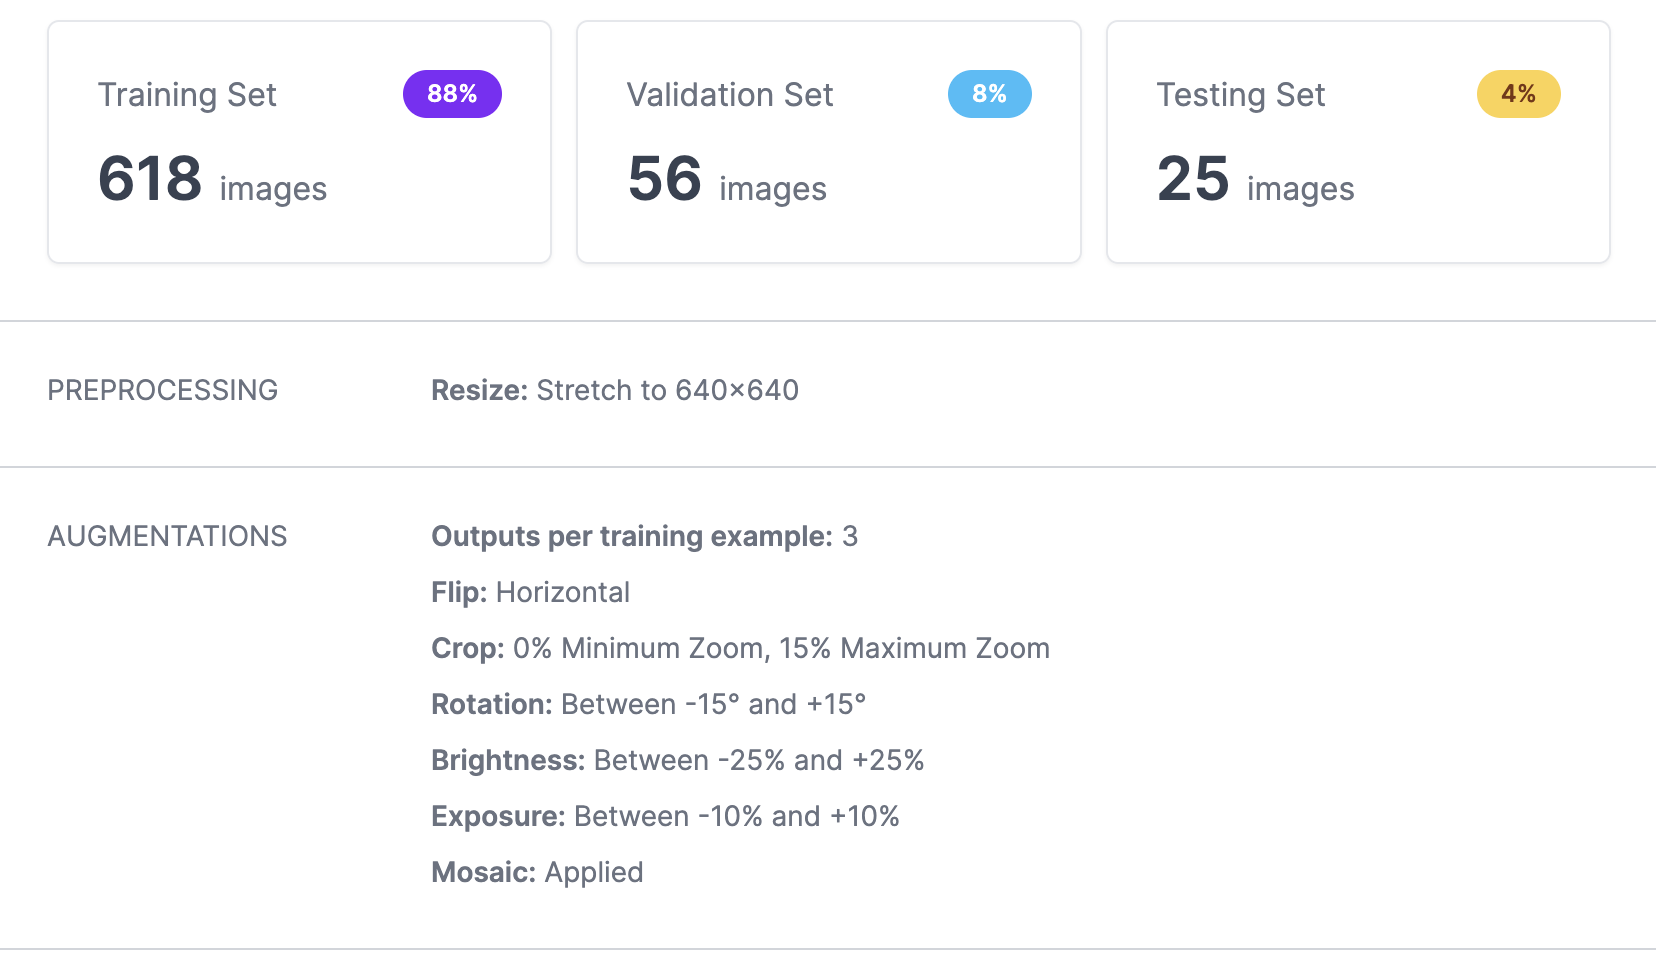

In [ ]:
%cd /content/drive/MyDrive/yolov7/

/content/drive/MyDrive/yolov7


In [ ]:
!pip install PyYAML==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 34.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%cd /content/drive/MyDrive/yolov7/yolov7

/content/drive/MyDrive/yolov7/yolov7


#Prepare dataset.yaml file
Sample dataset.yaml looks like this

train: '/content/drive/MyDrive/yolov7/data/yolov7-roboflow-28-Jul/train/images'

val: '/content/drive/MyDrive/yolov7/data/yolov7-roboflow-28-Jul/valid/images'

test: '/content/drive/MyDrive/yolov7/data/yolov7-roboflow-28-Jul/test/images'

nc: 1

names: ['potholes']

#Selecting weights
Go to https://github.com/WongKinYiu/yolov7 and select the appropriate weight for training the model.

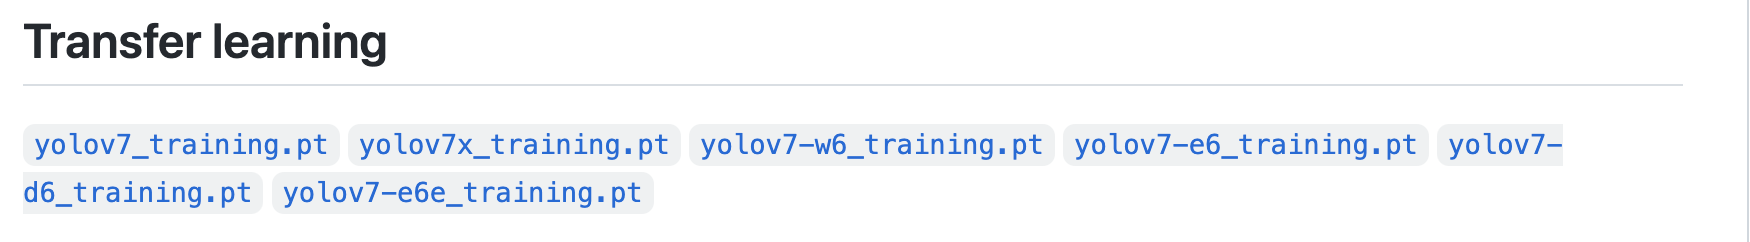

*Note: Please check the current working directory before downloading the weights (using %pwd) or provide the appropriate path*

Download the weight using the command: 

In [ ]:
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

#Train the model

In [ ]:
!python train.py --device 0  --batch-size 16 --epochs 350 --data dataset.yaml --img 640 640 --cfg cfg/training/yolov7_custom.yaml --weights ./weights/yolov7.pt --name yolov7 --hyp /content/drive/MyDrive/yolov7/yolov7/data/hyp.scratch.p6.yaml

YOLOR 🚀 v0.1-32-g31e2a90 torch 1.12.0+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7_custom.yaml', data='dataset.yaml', device='0', entity=None, epochs=350, evolve=False, exist_ok=False, global_rank=-1, hyp='/content/drive/MyDrive/yolov7/yolov7/data/hyp.scratch.p6.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='yolov7', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov710', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='./weights/yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, war

#Testing the model
You can test the now trained model by providing an appropriate path for test images and also, by providing path for best.pt

In [ ]:
!python detect.py --weights /content/drive/MyDrive/yolov7/yolov7/runs/train/yolov714/weights/best.pt --conf 0.25 --img-size 640 --source /content/drive/MyDrive/yolov7/data/test.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/yolov7/data/test.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/yolov7/yolov7/runs/train/yolov714/weights/best.pt'])
YOLOR 🚀 v0.1-32-g31e2a90 torch 1.12.0+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-

In [ ]:
# !git clone https://github.com/WongKinYiu/yolov7.git